# RLab03 - Gabriele Bertinelli (2103359)

In [24]:
library(tidyverse)
library(gridExtra)
library(latex2exp)
library(emdbook)

set.seed(2103359)

#### 1)  
**1.1)**    

- We assume a *positive uniform* prior $\rightarrow g(\mu)=1$ for $\mu \gt 0$.  
- The likelihood for Poisson process, in case of multiple independent measurements, is $f(\{y_i\}|\mu) = \prod_{i=1}^n f(y_i|\mu) \propto \mu^{\sum y_i}\times e^{-n\mu}$.  
- The posterior will be $P(\mu|\{y_i\}) \propto f(\{y_i\}|\mu) \times g(\mu) \propto \mu^{\sum y_i}\times e^{-n\mu}$.  
  This is a $Gamma(\alpha, \lambda)$ function with $\alpha = \sum y_i + 1$ and $\lambda = n$.

[1] "Analytical Mean: 3.00"
[1] "Analytical Variance: 0.50"
[1] "Analytical Median: 2.94"

[1] "Numerical Mean: 2.83"
[1] "Numerical Variance: 2.14"
[1] "Numerical Median: 3.00"


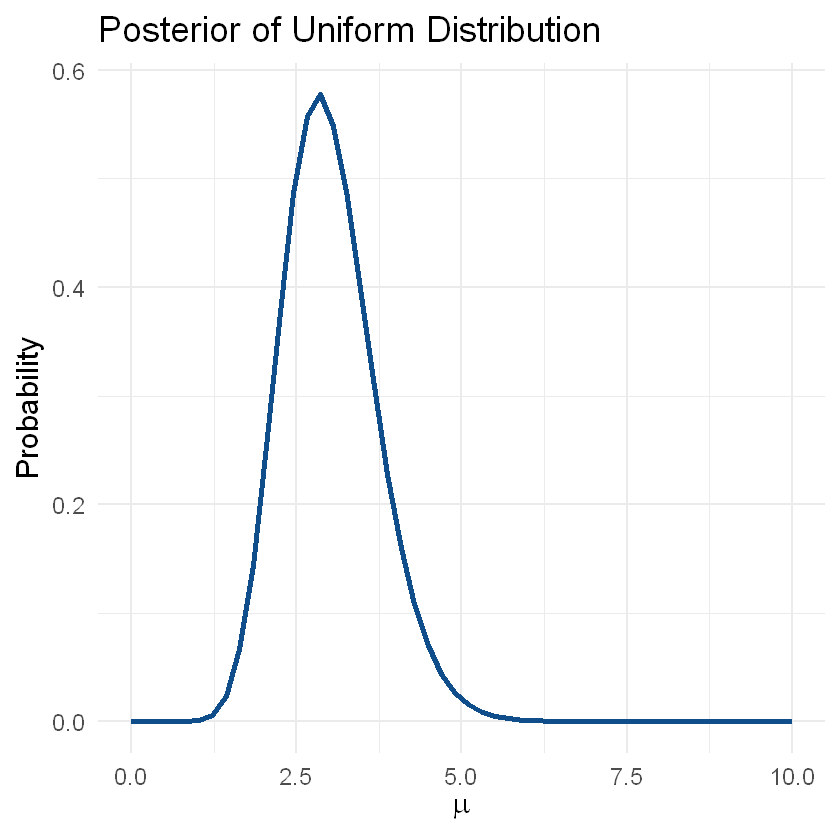

In [3]:
Dt <- 10 # sec
n.parts <- c(4,1,3,1,5,3)

post.alpha <- sum(n.parts) + 1
post.lambda <- length(n.parts)

x <- seq(0, 10, length=50)

unif.post.pdf <- dgamma(x, post.alpha, rate = post.lambda)

options(repr.plot.width = 7, repr.plot.height = 7)

unif.plot <- ggplot() +
    geom_line(aes(x=x, y=unif.post.pdf), color="dodgerblue4", lwd=1.5) +
	xlab(TeX(r'(\mu)')) +
	ylab("Probability") +
	ggtitle("Posterior of Uniform Distribution") +
	theme_minimal(base_size = 18)

unif.plot

a.mean <- post.alpha / post.lambda
a.var <- post.alpha / post.lambda^2
a.median <- qgamma(0.5, post.alpha, rate = post.lambda)

n.mean <- sum(n.parts) / length(n.parts)
n.var <- sum((n.parts - n.mean)^2) / length(n.parts)
n.median <- median(n.parts)

print(sprintf("Analytical Mean: %.2f", a.mean))
print(sprintf("Analytical Variance: %.2f", a.var))
print(sprintf("Analytical Median: %.2f", a.median))
cat('\n')
print(sprintf("Numerical Mean: %.2f", n.mean))
print(sprintf("Numerical Variance: %.2f", n.var))
print(sprintf("Numerical Median: %.2f", n.median))

**1.2)**  

- This time we assume a Gamma prior so that $\mu=\frac{\alpha}{\lambda}=3$ and $\sigma=\sqrt{\frac{\alpha}{\lambda^2}}=1$. In this way the parameters for our Gamma prior will be $\lambda=\frac{3}{1^2}=3$ and $\alpha=\left(\frac{3}{1}\right)^2=9$.  
- The posterior will a $Gamma(\alpha', \lambda')$ function with $\alpha'=\alpha+\sum y_i$ and $\lambda'=\lambda+n$.

[1] "Analytical Mean: 2.89"
[1] "Analytical Variance: 0.32"
[1] "Analytical Median: 2.85"

[1] "Numerical Mean: 2.83"
[1] "Numerical Variance: 2.14"
[1] "Numerical Median: 3.00"


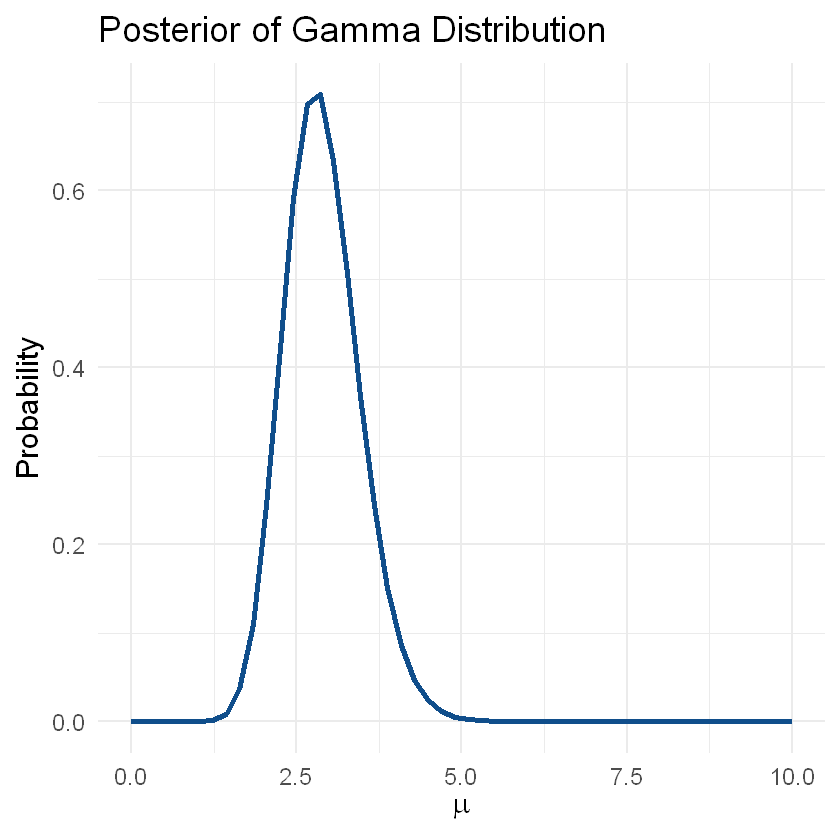

In [4]:
gamma.alpha <- 9 + sum(n.parts)
gamma.lambda <- 3 + length(n.parts)

gamma.post.pdf <- dgamma(x, gamma.alpha, rate = gamma.lambda)

options(repr.plot.width = 7, repr.plot.height = 7)

gamma.plot <- ggplot() +
    geom_line(aes(x=x, y=gamma.post.pdf), color="dodgerblue4", lwd=1.5) +
	xlab(TeX(r'(\mu)')) +
	ylab("Probability") +
	ggtitle("Posterior of Gamma Distribution") +
	theme_minimal(base_size = 18)

gamma.plot

a.mean <- gamma.alpha / gamma.lambda
a.var <- gamma.alpha / gamma.lambda^2
a.median <- qgamma(0.5, gamma.alpha, rate = gamma.lambda)

n.mean <- sum(n.parts) / length(n.parts)
n.var <- sum((n.parts - n.mean)^2) / length(n.parts)
n.median <- median(n.parts)

print(sprintf("Analytical Mean: %.2f", a.mean))
print(sprintf("Analytical Variance: %.2f", a.var))
print(sprintf("Analytical Median: %.2f", a.median))
cat('\n')
print(sprintf("Numerical Mean: %.2f", n.mean))
print(sprintf("Numerical Variance: %.2f", n.var))
print(sprintf("Numerical Median: %.2f", n.median))

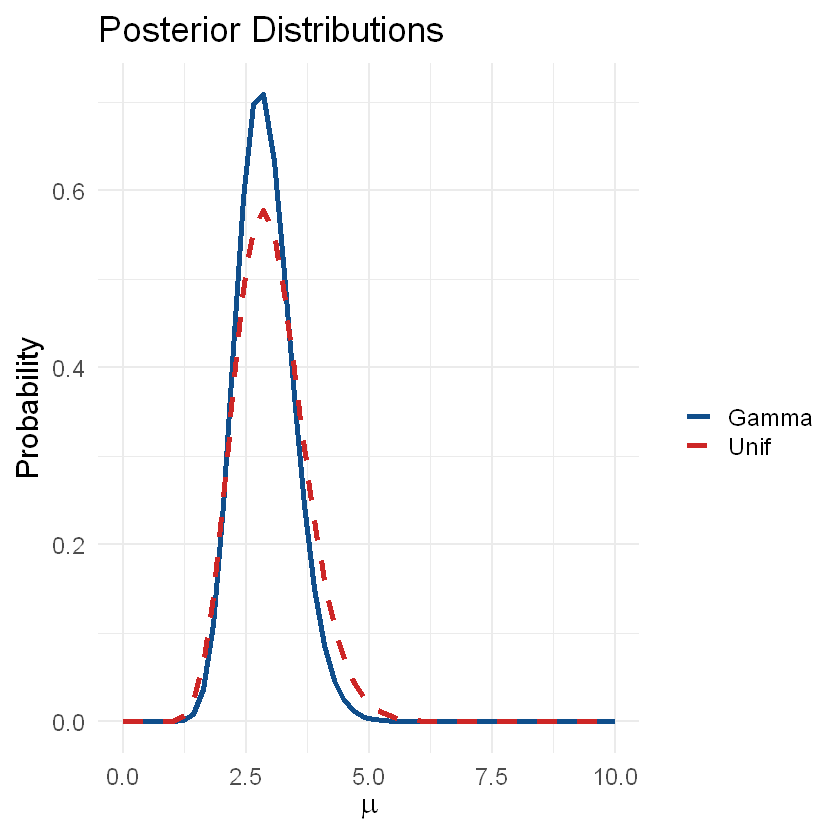

In [5]:
post.plot <- ggplot() +
    geom_line(aes(x=x, y=gamma.post.pdf, color='Gamma'), lwd=1.5) +
	geom_line(aes(x=x, y=unif.post.pdf, color='Unif'), lwd=1.5, linetype='dashed') +
	labs(x=TeX(r'(\mu)'), y='Probability', title='Posterior Distributions', color = '') +
	theme_minimal(base_size = 18) + 
	scale_color_manual(values=c('Gamma' = 'dodgerblue4', 'Unif' = 'firebrick3'))

post.plot

**1.3)**

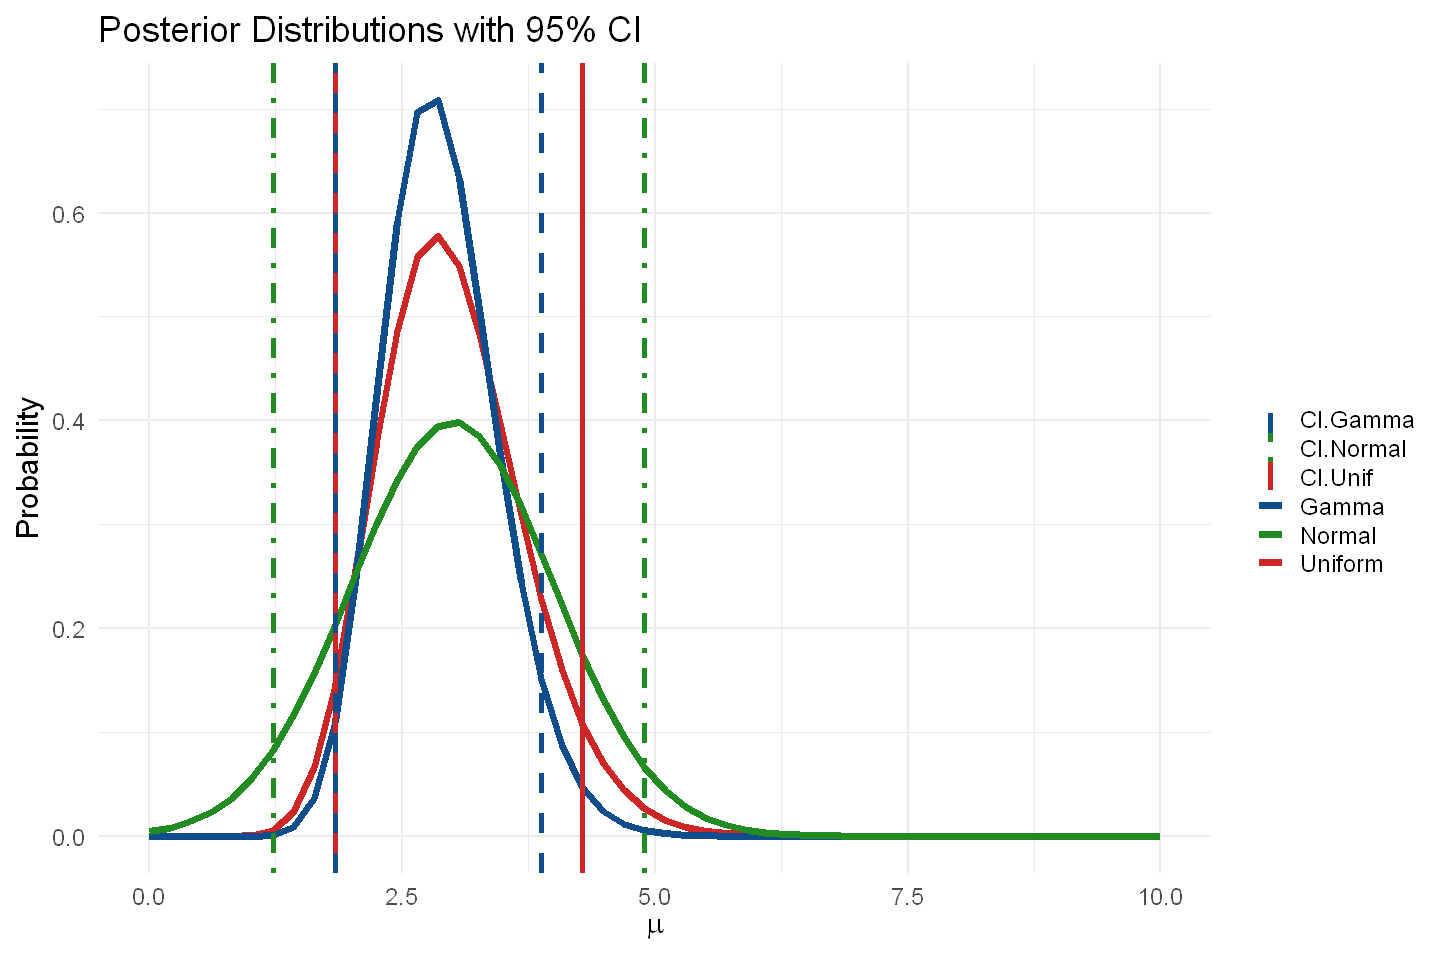

In [35]:
normal.post.pdf <- dnorm(x, mean = 3, sd = 1)

ci.unif <- emdbook::ncredint(x, unif.post.pdf, level=0.95)
ci.gamma <- emdbook::ncredint(x, gamma.post.pdf, level=0.95)
ci.normal <- emdbook::ncredint(x, normal.post.pdf, level=0.95)

options(repr.plot.width = 12, repr.plot.height = 8)

ci.plot <- ggplot() + 
	geom_line(aes(x=x, y=unif.post.pdf, color='Uniform'), lwd=2) +
	geom_line(aes(x=x, y=gamma.post.pdf, color='Gamma'), lwd=2) +
	geom_line(aes(x=x, y=normal.post.pdf, color='Normal'), lwd=2) +
	geom_vline(aes(xintercept = ci.unif[1], color = "CI.Unif"), linewidth = 1.5) +
	geom_vline(aes(xintercept = ci.unif[2], color = 'CI.Unif'), linewidth = 1.5) +

	geom_vline(aes(xintercept = ci.gamma[1], color = "CI.Gamma"), linewidth = 1.5, linetype='dashed') +
	geom_vline(aes(xintercept = ci.gamma[2], color = 'CI.Gamma'), linewidth = 1.5, linetype='dashed') +

	geom_vline(aes(xintercept = ci.normal[1], color = "CI.Normal"), linewidth = 1.5, linetype='dotdash') +
	geom_vline(aes(xintercept = ci.normal[2], color = 'CI.Normal'), linewidth = 1.5, linetype='dotdash') +

	labs(x=TeX(r'(\mu)'), y='Probability', title='Posterior Distributions with 95% CI', color = '') +
	theme_minimal(base_size = 18) + 
	scale_color_manual(values=c('Uniform' = 'firebrick3', 'Gamma' = 'dodgerblue4', 'Normal' = 'forestgreen', 
		'CI.Unif' = 'firebrick3', 'CI.Gamma' = 'dodgerblue4', 'CI.Normal' = 'forestgreen'))

ci.plot

#### 2)  
**2.1)**